In [1]:
import datetime
import json
import boto3
import io
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
#import seaborn as sns
plt.style.use('ggplot')

In [8]:
pickle_file = '../btc-autotrader/lib/data/log/2019-03-10T17:28:35.071011.pickle'

In [9]:
df = pd.read_pickle(pickle_file)

In [16]:
df

,datetime,cash,cash_orig,btc_in_possession,btc_current_price,position,rate_of_change,total_value,acceleration,bid_high,ask_low,bought_price,sold_price
0,2019-03-10 17:28:37.028923,41260.0,41260.0,0.016341,433044.0,BIDDED,0.355928,0,0,432785.0,433044.0,0,0
0,2019-03-10 17:28:45.888595,36929.0,41260.0,0.026329,432978.0,POSSESSING,0.319460,0,-0.00411623,432785.0,433006.0,432978,0
0,2019-03-10 17:28:55.831935,32599.0,41260.0,0.036318,432978.0,ASKED,0.322631,0,0.000318968,432785.0,432974.0,432978,0
0,2019-03-10 17:29:06.007772,32599.0,41260.0,0.026305,432978.0,ASKED,0.322631,0,0,432848.0,433012.0,432978,0
0,2019-03-10 17:29:14.537834,32599.0,41260.0,0.026305,432978.0,ASKED,0.322631,0,0,432869.0,433052.0,432978,0
0,2019-03-10 17:29:23.165742,32599.0,41260.0,0.026305,432987.0,ASKED,0.326108,0,0.000402925,432869.0,433032.0,432978,0
0,2019-03-10 17:29:32.687344,32599.0,41260.0,0.026305,432987.0,ASKED,0.328776,0,0.000280257,432836.0,432992.0,432978,0
0,2019-03-10 17:29:43.058311,32599.0,41260.0,0.026305,432987.0,ASKED,0.328776,0,0,432856.0,433052.0,432978,0
0,2019-03-10 17:29:51.740931,32599.0,41260.0,0.026305,432987.0,ASKED,0.328776,0,0,432869.0,433052.0,432978,0
0,2019-03-10 17:29:59.954815,32599.0,41260.0,0.026305,432987.0,ASKED,0.328776,0,0,432882.0,433052.0,432978,0


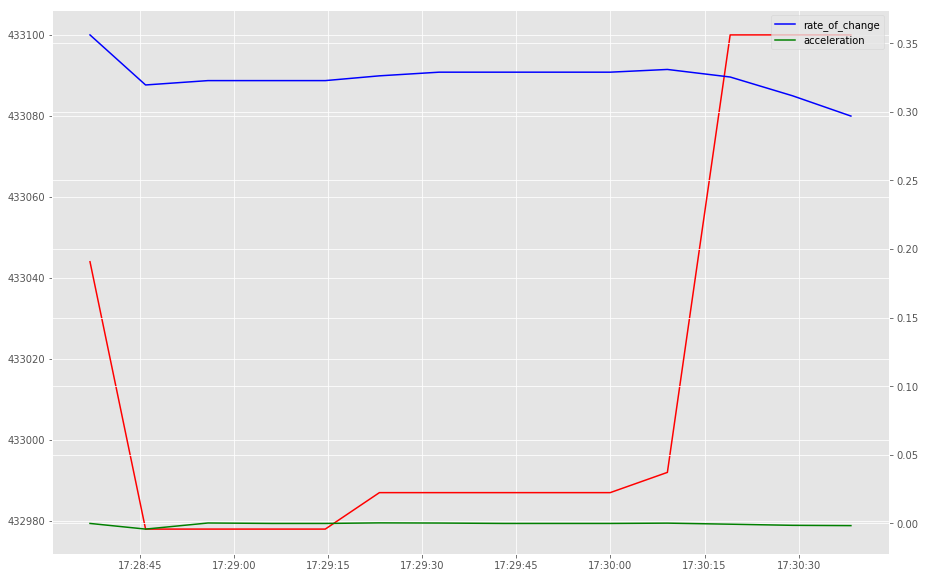

In [12]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.btc_current_price, color='r')
ax1.plot(df.datetime, df.btc_current_price.rolling(70).mean(), color='pink')
#ax1.scatter(df.datetime, df.bid_price, color='black')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()

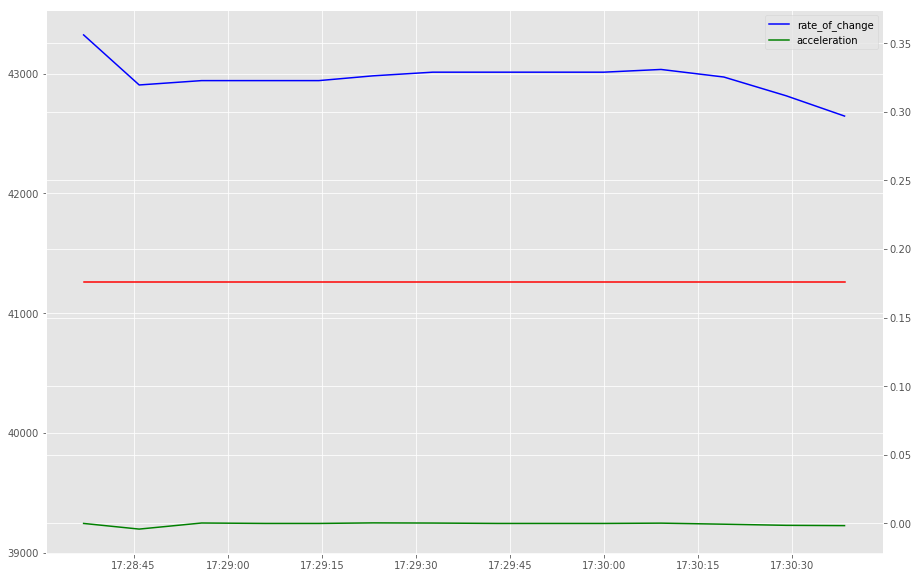

In [13]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.cash_orig, color='r')
#ax1.scatter(df.datetime, df.bid_price, color='black')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()

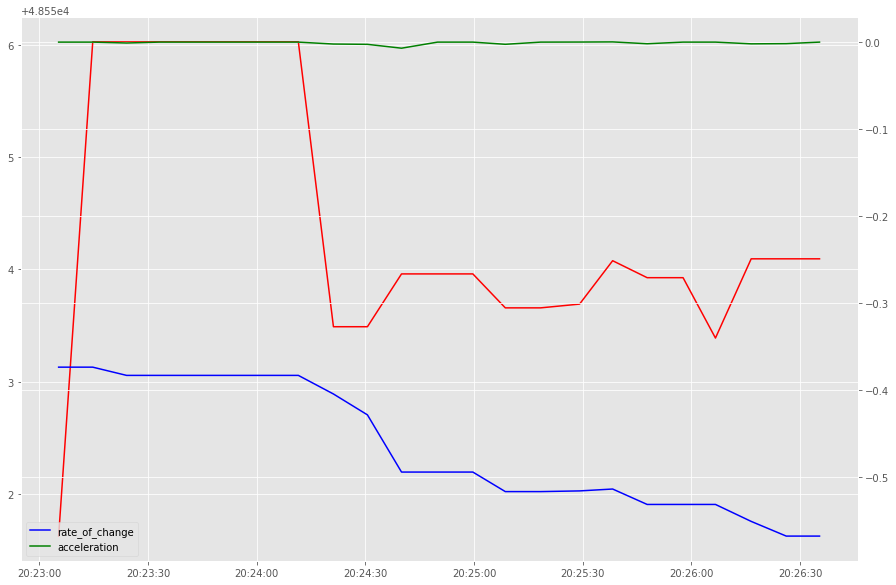

In [29]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.total_value, color='r')
ax2.plot(df.datetime, df.rate_of_change, color='b')
ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()

In [30]:
df.total_value.iloc[-1] - df.total_value.iloc[0]

2.4657045000058133

No handles with labels found to put in legend.


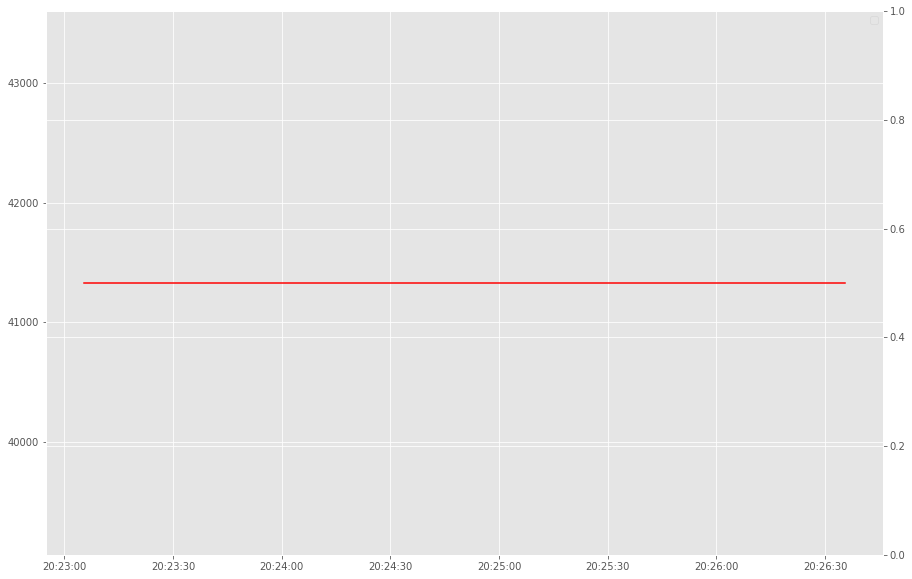

In [31]:
fig, ax1 = plt.subplots(figsize=(15,10))
ax2 = ax1.twinx()
ax1.plot(df.datetime, df.cash, color='r')
#ax2.plot(df.datetime, df.rate_of_change, color='b')
#ax2.plot(df.datetime, df.acceleration, color='g')
ax2.legend()
plt.show()